In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv("Cancer_data.csv")
print(a)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1          3.519683              0     

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [4]:
x=a.iloc[:,[1,2,3,4,5,6,7]].values
y=a.iloc[:,8].values

In [5]:
print(x)

[[ 1.         16.08531332  0.         ...  8.14625056  4.14821903
   1.        ]
 [ 0.         30.82878439  0.         ...  9.36163042  3.51968334
   0.        ]
 [ 1.         38.78508356  0.         ...  5.13517867  4.72836769
   0.        ]
 ...
 [ 1.         32.6138607   1.         ...  0.4668482   0.15010113
   0.        ]
 [ 0.         25.56821592  0.         ...  7.79531682  1.98613765
   1.        ]
 [ 1.         23.6631042   0.         ...  2.52586007  2.85660008
   1.        ]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from catboost import  CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(x_train,y_train)

Learning rate set to 0.011136
0:	learn: 0.6847512	total: 136ms	remaining: 2m 15s
1:	learn: 0.6764783	total: 140ms	remaining: 1m 9s
2:	learn: 0.6680540	total: 143ms	remaining: 47.5s
3:	learn: 0.6609416	total: 147ms	remaining: 36.6s
4:	learn: 0.6523109	total: 150ms	remaining: 29.9s
5:	learn: 0.6439441	total: 155ms	remaining: 25.6s
6:	learn: 0.6358693	total: 159ms	remaining: 22.5s
7:	learn: 0.6277193	total: 163ms	remaining: 20.2s
8:	learn: 0.6202320	total: 167ms	remaining: 18.3s
9:	learn: 0.6122965	total: 170ms	remaining: 16.9s
10:	learn: 0.6051145	total: 174ms	remaining: 15.7s
11:	learn: 0.5982617	total: 178ms	remaining: 14.6s
12:	learn: 0.5920741	total: 183ms	remaining: 13.9s
13:	learn: 0.5850539	total: 188ms	remaining: 13.2s
14:	learn: 0.5783388	total: 193ms	remaining: 12.6s
15:	learn: 0.5735300	total: 198ms	remaining: 12.2s
16:	learn: 0.5674206	total: 203ms	remaining: 11.8s
17:	learn: 0.5639894	total: 207ms	remaining: 11.3s
18:	learn: 0.5581910	total: 214ms	remaining: 11s
19:	learn: 0

In [9]:
y_pred=classifier.predict(x_test)

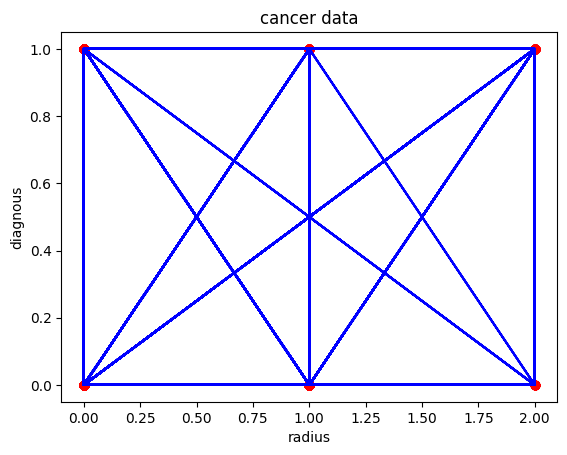

In [15]:
plt.scatter(x_train[:,3],y_train,color='red')
plt.plot(x_train[:,3],classifier.predict(x_train),color='blue')
plt.title("cancer data")
plt.xlabel("radius")
plt.ylabel("diagnous")
plt.show()

In [19]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.8433333333333334
[[174  21]
 [ 26  79]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       195
           1       0.79      0.75      0.77       105

    accuracy                           0.84       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.84      0.84      0.84       300



In [18]:
from sklearn.metrics import roc_curve
roc_curve=roc_curve(y_test,y_pred)
print(roc_curve)


(array([0.        , 0.10769231, 1.        ]), array([0.        , 0.75238095, 1.        ]), array([inf,  1.,  0.]))


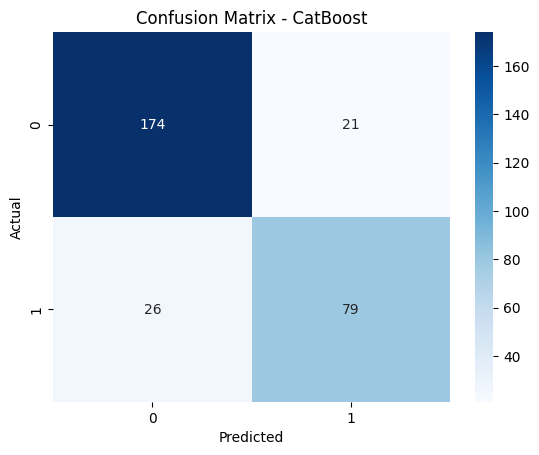

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()